# ----------------Text Data Analysis (Youtube Case-study)----------------

---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot

import os
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Loading the dataset

In [2]:
videos = pd.read_csv('F:/My Portfolio/Projects for Porfolio/Data Analytics Real-World Projects in Python/--My_work--/Project 1- Text Data Analysis/1-Youtube/UScomments.csv', on_bad_lines='skip')

C:\Users\wolle\AppData\Local\Temp\ipykernel_17640\70476390.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
videos.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


---

### Wordcloud representation of Sentiments

In [4]:
polarity = []

for row in videos['comment_text']:
    try:
        polarity.append(TextBlob(row).sentiment.polarity)
    except:
        polarity.append(0)

In [5]:
videos['polarity'] = polarity

In [6]:
videos.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


Positive wordcloud

In [7]:
positive_comments = videos[videos['polarity'] == 1]

In [8]:
positive_comments.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [9]:
total_postive_comments =' '.join(positive_comments['comment_text'])
len(total_postive_comments)

846560

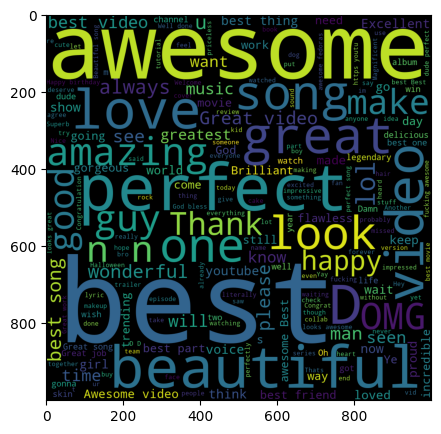

In [10]:
plt.figure(figsize=(6, 5))
positive_wordcloud = WordCloud(height=1000, width=1000, stopwords=set(STOPWORDS)).generate(total_postive_comments)
plt.imshow(positive_wordcloud)
plt.show()

Negative Wordcloud

In [11]:
negative_comments = videos[videos['polarity'] == -1]

In [12]:
negative_comments.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [13]:
total_negative_comments =' '.join(negative_comments['comment_text'])
len(total_negative_comments)

190787

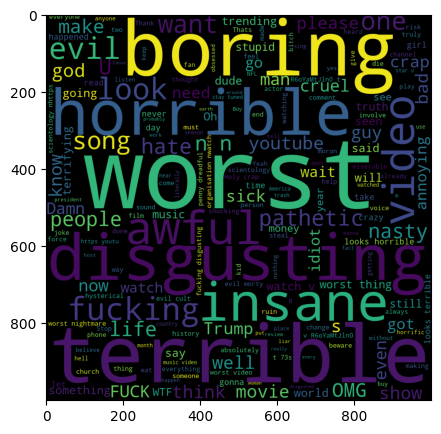

In [14]:
plt.figure(figsize=(6, 5))
negative_wordcloud = WordCloud(height=1000, width=1000, stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.imshow(negative_wordcloud)
plt.show()

---

### Analyzing the Trending Tags and Views of Youtube

In [15]:
videos2 = pd.read_csv('F:/My Portfolio/Projects for Porfolio/Data Analytics Real-World Projects in Python/--My_work--/Project 1- Text Data Analysis/1-Youtube/additional_data/USvideos.csv', on_bad_lines='skip')

Analyzing the most popular tags from YouTube videos

In [16]:
videos2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [17]:
print(videos2['tags'][1])

last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"


In [18]:
videos2['tags'] = videos2['tags'].str.replace(pat=r'(\|")|("\|")|(")|(\|)("\|)', repl=' ', regex=True)

In [19]:
print(videos2['tags'][1])

last week tonight trump presidency last week tonight donald trump john oliver trump donald trump 


In [20]:
tags = ' '.join(videos2['tags'])

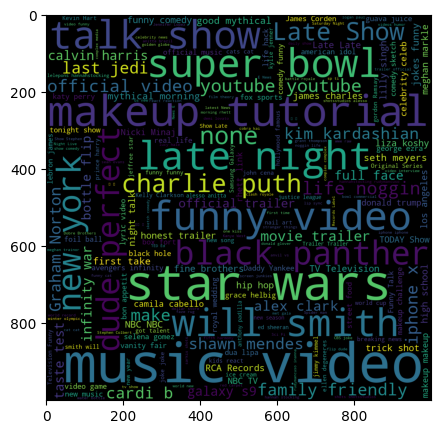

In [21]:
plt.figure(figsize=(8, 5))
tags_wordcloud = WordCloud(height=1000, width=1000, stopwords=set(STOPWORDS)).generate(tags)
plt.imshow(tags_wordcloud)
plt.show()

Analyzing the relationship between 'views' VS 'likes' and 'dislikes'

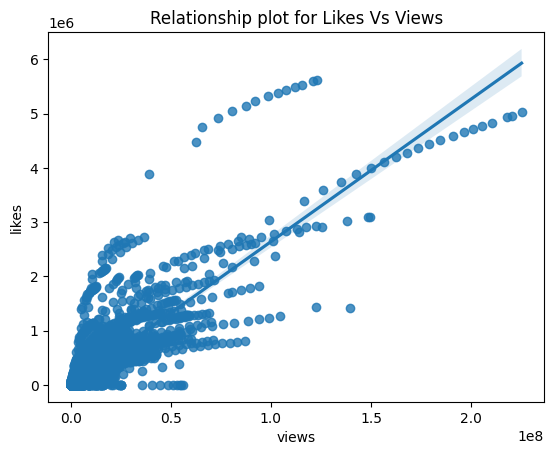

In [22]:
sns.regplot(data=videos2, x='views', y='likes');
plt.title('Relationship plot for Likes Vs Views');

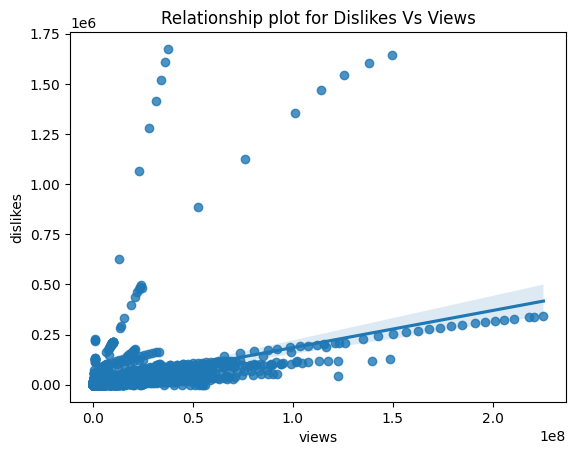

In [23]:
sns.regplot(data=videos2, x='views', y='dislikes');
plt.title('Relationship plot for Dislikes Vs Views');

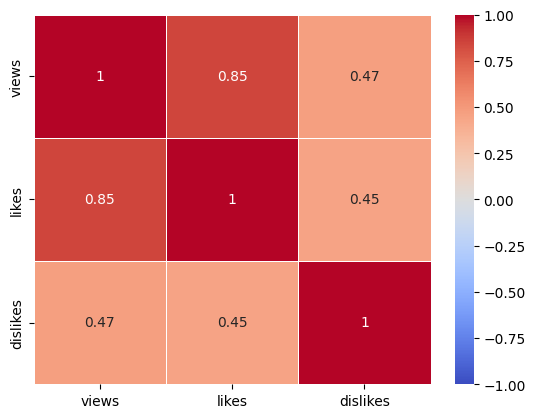

In [24]:
sns.heatmap(videos2[['views', 'likes', 'dislikes']].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white');

---

### Perfroming Emoji's Analysis

In [25]:
videos.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [26]:
videos['comment_text'] = videos['comment_text'].astype('str')

Collecting all emojis in the dataframe

In [27]:
import emoji

emojis_list = []
for comment in videos['comment_text']:
    for char in comment:
        if emoji.is_emoji(char):
            emojis_list.append(char)

In [28]:
emojis_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [29]:
len(emojis_list)

294549

Collecting the most used emojis using 'collections'

In [30]:
from collections import Counter

In [31]:
emojis = [Counter(emojis_list).most_common(10)[i][0] for i in range(10)]

In [32]:
freqs = [Counter(emojis_list).most_common(10)[i][1] for i in range(10)]

Visualizing emojis' frequencies

In [33]:
view = go.Bar(x=emojis, y=freqs)

In [34]:
iplot([view])

---

### Importing the entire Youtube Data

In [38]:
path = 'F:/My Portfolio/Projects for Porfolio/Data Analytics Real-World Projects in Python/--My_work--/Project 1- Text Data Analysis/1-Youtube/additional_data'

In [39]:
files = os.listdir(path)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [40]:
files_csv = [files[file] for file in range(0, len(files), 2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [41]:
for file in files_csv:
    print(file[0:2])

CA
DE
FR
GB
IN
JP
KR
MX
RU
US


In [42]:
full_df = pd.DataFrame()
for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', on_bad_lines='skip')
    current_df['country'] = file[0:2]
    full_df = pd.concat([full_df, current_df])

In [40]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


---

### Analysing the most liked category of Youtube

In [41]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [42]:
categories = pd.read_csv('F:/My Portfolio/Python Projects for Porfolio/Data Analytics Real-World Projects in Python/--My_work--/Project 1- Text Data Analysis/1-Youtube/category_file.txt', sep=':')

In [43]:
categories.head()

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [44]:
categories.reset_index(inplace=True)

In [45]:
categories.columns = ['Category_id', 'Category_name']

In [46]:
categories.set_index('Category_id', inplace=True)

In [47]:
categories.head()

,Category_name
Category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [48]:
cat_dict = categories.to_dict()

In [49]:
cat_dict['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [50]:
full_df['category_name'] = full_df['category_id'].map(cat_dict['Category_name'])

In [51]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [52]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


In [53]:
full_df.groupby('category_name')['likes'].sum().sort_values(ascending=False)

category_name
Music                    7227198427
Entertainment            2857743591
Comedy                   1081392644
People & Blogs            692550961
Film & Animation          589885590
Sports                    399630743
Howto & Style             347338295
Gaming                    298337663
Science & Technology      252570921
News & Politics           163503422
Education                 117479047
Nonprofits & Activism      93538593
Pets & Animals             56601492
Autos & Vehicles           45461895
Travel & Events            13494079
Shows                       4570827
Movies                      1005417
Trailers                        198
Name: likes, dtype: int64

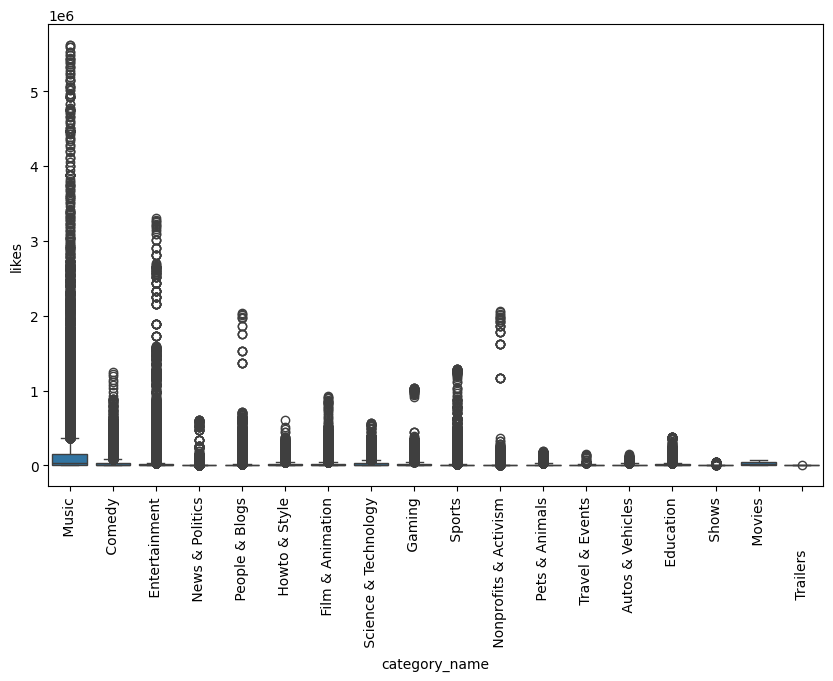

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='category_name', y='likes')
plt.xticks(rotation='vertical')
plt.show()

---

### Analyzing whether audience is engaged or not !

In [55]:
# Calculating like rate, dislike rate and comment rate with respect to the total views

full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_rate'] = (full_df['comment_count'] / full_df['views']) * 100

In [56]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


Visualizing like rate among different categories

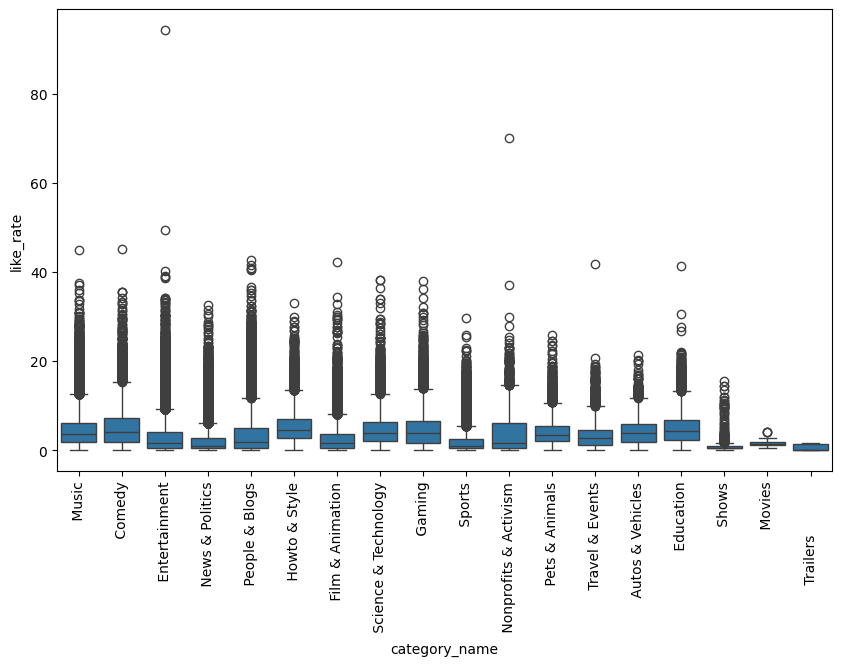

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='category_name', y='like_rate');
plt.xticks(rotation='vertical')
plt.show()

Visualizing dislike rate among different categories

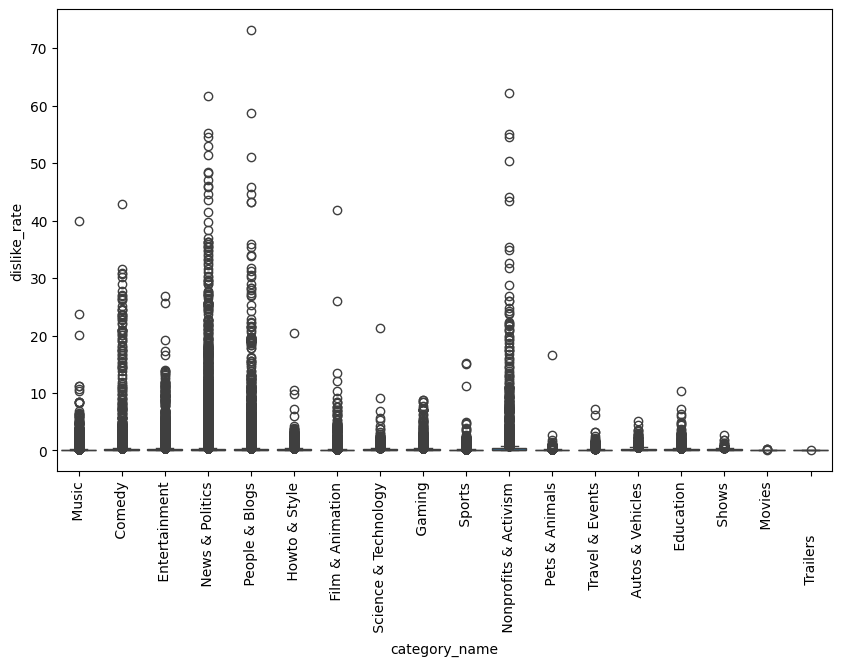

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='category_name', y='dislike_rate');
plt.xticks(rotation='vertical')
plt.show()

Visualizing comment rate among different categories

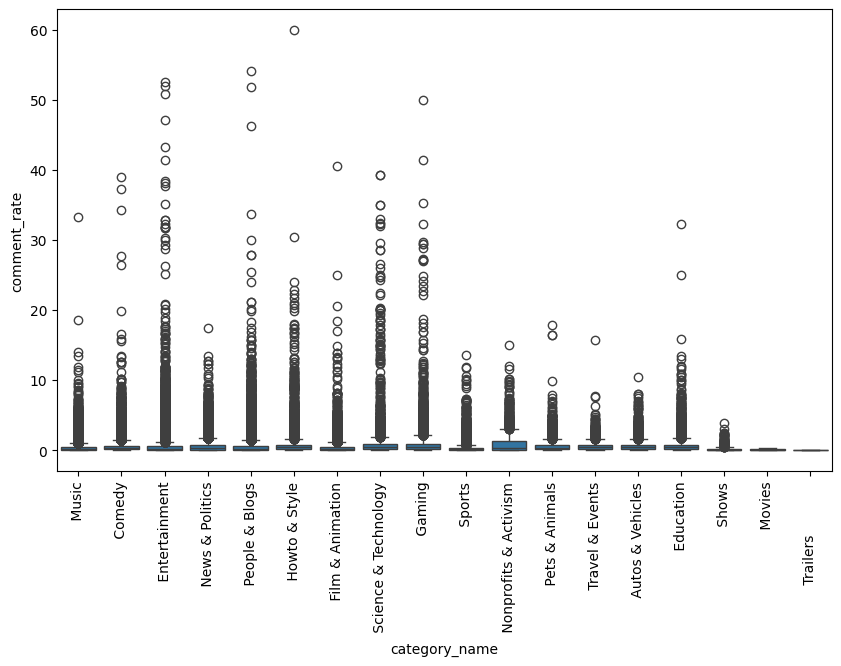

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='category_name', y='comment_rate');
plt.xticks(rotation='vertical')
plt.show()

Visualizing the relationship between views and likes, views and dislikes

In [60]:
# sns.regplot(data=full_df, x='views', y='dislikes');

In [61]:
# sns.regplot(data=full_df, x='views', y='likes');

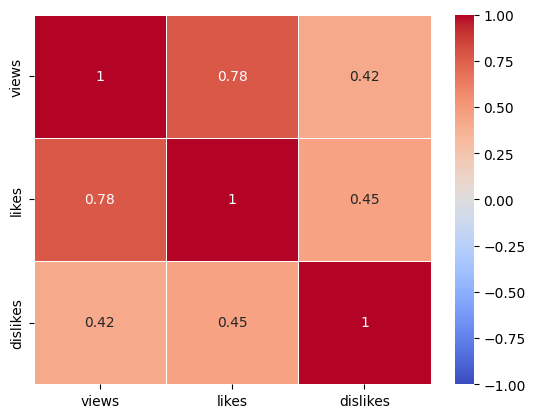

In [62]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmax=1, 
            vmin=-1, 
            linecolor='white', 
            linewidths=0.4);

---

### Analyzing trending videos !

In [44]:
trending = (
            full_df.groupby('channel_title').
            agg({'video_id' : 'count'}).
            sort_values(by='video_id', ascending=False).
            reset_index().
            rename(columns={'video_id':'total_videos'})
            )

In [45]:
top_20 = trending[0:20]

In [65]:
px.bar(data_frame=top_20, x='channel_title', y='total_videos')

---

### Do Punctuations have an impact on views, likes, dislikes?

In [66]:
import string

def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [67]:
full_df['punc_count'] = full_df['title'].apply(punc_count)

In [68]:
full_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_rate,punc_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1


In [83]:
punc_data = full_df.loc[full_df['punc_count'] <=12, ['punc_count', 'views']]

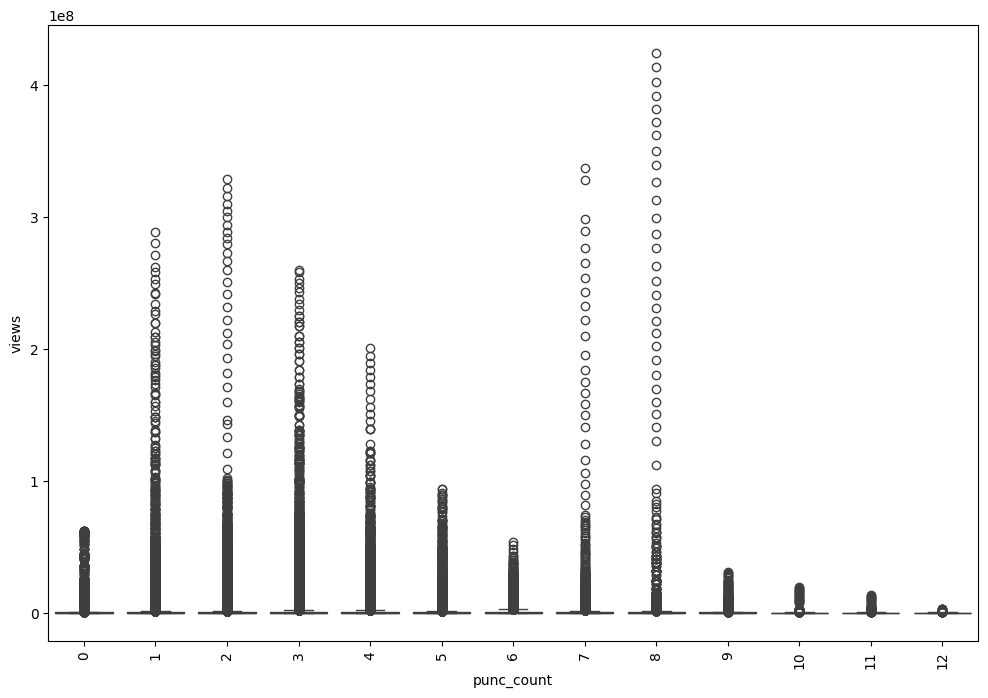

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=punc_data, x='punc_count', y='views');
plt.xticks(rotation='vertical')
plt.show()

---